In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-hackathon-2024-faces/labels.csv
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/69408896.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/69934968.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/3410477.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/44989956.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/79053495.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/3787201.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/75097527.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/31391762.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/image_1769.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/56212495.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/3391976.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/68749995.jpg
/kaggle/input/ai-hackathon-2024-faces/public_test/pu

In [7]:
data_link = "/kaggle/input/ai-hackathon-2024-faces/data/mnt/md0/projects/sami-hackathon/private/data"
labels_link = "/kaggle/input/ai-hackathon-2024-faces/labels.csv"
public_test = "/kaggle/input/ai-hackathon-2024-faces/public_test/public_test"
private_test = "/kaggle/input/ai-hackathon-2024-faces/private_test/data"

In [8]:
labels = pd.read_csv(labels_link)

In [9]:
labels

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
0,100013282.jpg,1333,2000,"[934.0000000000097, 144.82228672769534, 238.24...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male
1,100016175.jpg,1333,2000,"[1094.0513571635438, 422.91772295627203, 55.45...",20-30s,Caucasian,unmasked,light,Neutral,Male
2,10004189.jpg,2000,1333,"[419.93871061403877, 269.1250391680045, 377.19...",20-30s,Mongoloid,unmasked,light,Happiness,Female
3,100104575.jpg,1333,2000,"[1490.6909678848915, 676.0000000000097, 37.553...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male
4,100104600.jpg,2000,1333,"[549.169724453414, 92.52040334013152, 306.8821...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female
...,...,...,...,...,...,...,...,...,...,...
15305,image_2713.jpg,1024,1024,"[244.71717171717162, 176.66666666666654, 587.2...",40-50s,Caucasian,unmasked,mid-light,Happiness,Male
15306,image_3332.jpg,1024,1024,"[265.6338028169031, 174.2441314553992, 584.727...",Senior,Caucasian,unmasked,light,Happiness,Female
15307,image_6905.jpg,1024,1024,"[251.3434343434343, 184.7171717171712, 500.535...",20-30s,Caucasian,unmasked,light,Neutral,Male
15308,image_4080.jpg,1024,1024,"[222.72727272727235, 179.8181818181809, 586.90...",Kid,Caucasian,unmasked,light,Happiness,Female


In [10]:
labels.at[0, 'bbox']

'[934.0000000000097, 144.82228672769534, 238.24562254582438, 330.0662796338281]'

In [11]:
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


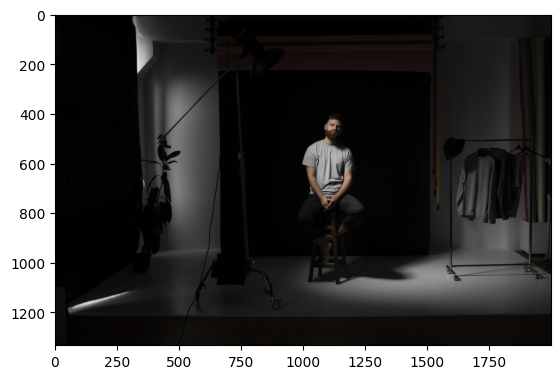

In [12]:
img = cv.imread("/kaggle/input/ai-hackathon-2024-faces/data/mnt/md0/projects/sami-hackathon/private/data/100016175.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 

In [13]:
img.shape

(1333, 2000, 3)

In [14]:
labels.at[1, 'bbox'][:1]

'['

1094.0513571635438 422.91772295627203 55.45378576262131 71.31039238064413
1094 423 55 71


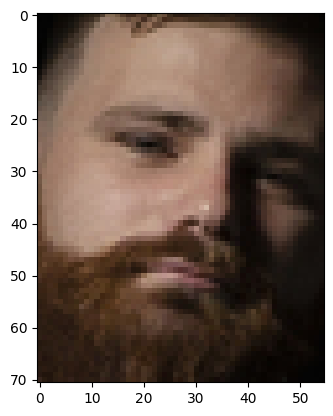

In [15]:
x, y, w, h = tuple([float(i) for i in labels.at[1, 'bbox'][1:-1].split(', ')])
print(x, y, w, h)
x, y, w, h = round(x), round(y), round(w), round(h)
print(x, y, w, h)
face = img[y:y+h, x:x+w]
plt.imshow(face)

In [16]:
bbox = dict()

for i in range(labels.shape[0]):
    filename = labels.at[i, 'file_name']
    bb = labels.at[i, 'bbox']
    skin = labels.at[i, 'skintone']
    x, y, w, h = tuple([float(i) for i in bb[1:-1].split(', ')])
    x, y, w, h = round(x), round(y), round(w), round(h)
    if filename not in bbox:
        bbox[filename] = ([], [])
    bbox[filename][0].append((x,y,w,h))
    bbox[filename][1].append(skin)

In [17]:
bbox['100013282.jpg']

([(934, 145, 238, 330)], ['mid-light'])

In [18]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.8 MB/s eta 0:00:00a 0:00:01


In [19]:
from mtcnn.mtcnn import MTCNN

In [22]:
class FACELOADING:
    def __init__(self, directory, is_train=True):
        self.directory = directory
        self.target_size = (224, 224)
        self.X = []
        self.y = []
        self.is_train = is_train
        self.detector = MTCNN() if not is_train else None
    
    
    def extract_data(self, filename, path):
        img = cv.imread(path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        return [(cv.resize(img[bb[1]:bb[1]+bb[3], bb[0]:bb[0]+bb[2]], self.target_size), lb) for bb, lb in zip(bbox[filename][0], bbox[filename][1])]


    def load_data(self):
        for im_name in os.listdir(self.directory):
            try:
                path = self.directory + '/' + im_name
                data = self.extract_data(im_name, path)
                self.X.extend([dt[0] for dt in data])
                self.y.extend([dt[1] for dt in data])
            except Exception as e:
                pass
        return np.asarray(self.X), np.asarray(self.y)

    
    '''
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)
        

    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')
    '''

In [23]:
faceloading = FACELOADING(data_link)
X, y = faceloading.load_data()

KeyboardInterrupt: 

In [12]:
X.shape

(15310, 224, 224, 3)

In [13]:
y.shape

(15310,)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
labels['skintone'].unique()

array(['mid-light', 'light', 'mid-dark', 'dark'], dtype=object)

In [15]:
input_shape = (224, 224, 3)
classes = ['mid-light', 'light', 'mid-dark', 'dark']
EPOCHS = 50  # Increase the number of epochs
BS = 32

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

NameError: name 'y' is not defined

In [17]:
type(y)

numpy.ndarray

In [18]:
X = tf.keras.applications.mobilenet_v2.preprocess_input(X)

In [20]:
type(X)

numpy.ndarray

In [39]:
import gc

In [20]:
X

array([[[[-0.73333335, -0.8745098 , -0.9137255 ],
         [-0.79607844, -0.9137255 , -0.9372549 ],
         [-0.75686276, -0.88235295, -0.90588236],
         ...,
         [-0.6784314 , -0.7254902 , -0.7019608 ],
         [-0.67058825, -0.70980394, -0.67058825],
         [-0.67058825, -0.7176471 , -0.6862745 ]],

        [[-0.7882353 , -0.9372549 , -0.9764706 ],
         [-0.7176471 , -0.8901961 , -0.9529412 ],
         [-0.60784316, -0.8039216 , -0.88235295],
         ...,
         [-0.6862745 , -0.75686276, -0.7490196 ],
         [-0.6784314 , -0.75686276, -0.7411765 ],
         [-0.5686275 , -0.64705884, -0.6392157 ]],

        [[-0.5529412 , -0.7647059 , -0.8509804 ],
         [-0.4352941 , -0.64705884, -0.7411765 ],
         [-0.4823529 , -0.7019608 , -0.79607844],
         ...,
         [-0.73333335, -0.8039216 , -0.81960785],
         [-0.7411765 , -0.827451  , -0.8352941 ],
         [-0.6784314 , -0.7411765 , -0.7490196 ]],

        ...,

        [[ 0.8117647 ,  0.5921569 ,  0

In [21]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
del X
gc.collect()

NameError: name 'X' is not defined

In [24]:
del y
gc.collect()

0

In [25]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [26]:
train_datagen = datagen.flow(train_X, train_y, batch_size=BS, shuffle=True)

In [27]:
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [28]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [38]:
test_y.shape

(3062,)

In [45]:
history = model.fit(
    train_datagen,
    steps_per_epoch=len(train_X) // BS,
    validation_data=(test_X, test_y),
    validation_steps=len(test_X) // BS,
    epochs=50,
    #callbacks=[lr_scheduler, early_stopping]  # Add both callbacks
)

Epoch 1/50
382/382 [==============================] - 130s 339ms/step - loss: 0.3771 - accuracy: 0.8428 - val_loss: 0.6058 - val_accuracy: 0.7472
Epoch 2/50
382/382 [==============================] - 120s 315ms/step - loss: 0.3732 - accuracy: 0.8456
Epoch 3/50
382/382 [==============================] - 121s 316ms/step - loss: 0.3747 - accuracy: 0.8436
Epoch 4/50
382/382 [==============================] - 120s 314ms/step - loss: 0.3753 - accuracy: 0.8442
Epoch 5/50
382/382 [==============================] - 120s 314ms/step - loss: 0.3667 - accuracy: 0.8481
Epoch 6/50
382/382 [==============================] - 120s 315ms/step - loss: 0.3685 - accuracy: 0.8449
Epoch 7/50
382/382 [==============================] - 119s 312ms/step - loss: 0.3700 - accuracy: 0.8446
Epoch 8/50
382/382 [==============================] - 122s 320ms/step - loss: 0.3673 - accuracy: 0.8516
Epoch 9/50
382/382 [==============================] - 120s 314ms/step - loss: 0.3738 - accuracy: 0.8451
Epoch 10/50
382/382 [=

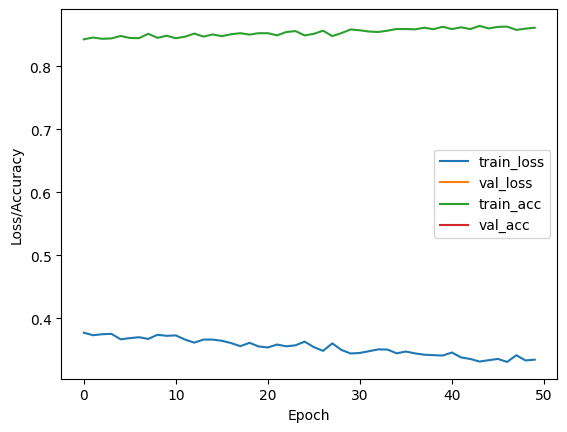

In [46]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

In [30]:
history.history

{'loss': [0.7963611483573914,
  0.6549621820449829,
  0.614815890789032,
  0.5856354236602783,
  0.5629600286483765,
  0.5453655123710632,
  0.5326266288757324,
  0.5122348666191101,
  0.5050830841064453,
  0.48934680223464966,
  0.47393158078193665,
  0.46144500374794006,
  0.44955217838287354,
  0.43064382672309875,
  0.4152248501777649,
  0.4092685580253601,
  0.4041402339935303,
  0.38918671011924744,
  0.3713780641555786,
  0.3635215163230896,
  0.3570035398006439,
  0.34069520235061646,
  0.33090800046920776,
  0.31941133737564087,
  0.3113774359226227,
  0.3002229630947113,
  0.2903761863708496,
  0.2834525406360626,
  0.27373450994491577,
  0.2626402676105499,
  0.25538280606269836,
  0.24315117299556732,
  0.24053657054901123,
  0.2329060286283493,
  0.22276553511619568,
  0.21528856456279755,
  0.20969389379024506,
  0.20082074403762817,
  0.19453519582748413,
  0.18693247437477112,
  0.17925360798835754,
  0.1743301898241043,
  0.16617250442504883,
  0.16138270497322083,
  0

In [47]:
preds = model.predict(test_X)
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(test_y, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(test_y, y_pred, target_names=classes))

96/96 [==============================] - 4s 41ms/step
Confusion Matrix:
[[  33    1   21   13]
 [   0 1853    8  236]
 [  16   21   62   60]
 [   3  353   42  340]]
Classification Report:
              precision    recall  f1-score   support

   mid-light       0.63      0.49      0.55        68
       light       0.83      0.88      0.86      2097
    mid-dark       0.47      0.39      0.42       159
        dark       0.52      0.46      0.49       738

    accuracy                           0.75      3062
   macro avg       0.61      0.55      0.58      3062
weighted avg       0.73      0.75      0.74      3062



In [62]:
del preds
gc.collect()

23767

In [63]:
del y_pred
gc.collect()

0

In [48]:
model.save('skin_classify_150epoch.keras')
print("saved")

saved


In [25]:
detector = MTCNN()

In [31]:
model = tf.keras.models.load_model('/kaggle/input/skintone-model-h5-lphuccs/skin_classify_150epoch.keras')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 2586948 (9.87 MB)
Trainable params: 328964

In [34]:
def prediction(filename):
    t_im = cv.imread(filename)
    t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
    x,y,w,h = detector.detect_faces(t_im)[0]['box']
    t_im = np.asarray(cv.resize(t_im[y:y+h, x:x+w], (224,224)))
    t_im = tf.keras.applications.mobilenet_v2.preprocess_input(t_im)
    pred = model.predict(t_im.reshape(1, 224, 224, 3))
    ypred = np.argmax(pred, axis=1)
    return pred, ypred

1/1 [==============================] - 0s 20ms/step


(array([[1.7930887e-08, 9.1945207e-01, 3.8477501e-06, 8.0544114e-02]],
       dtype=float32),
 array([1]))

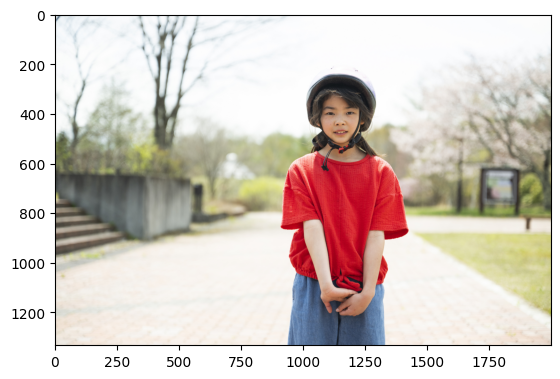

In [36]:
sample_path = "/kaggle/input/ai-hackathon-2024-faces/public_test/public_test/102971485.jpg"
img = cv.imread(sample_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 
prediction(sample_path)

In [38]:
def get_Xtest(path):
    X = []
    for im_name in os.listdir(path):
        try:
            filename = path + '/' + im_name
            t_im = cv.imread(filename)
            t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
            x,y,w,h = detector.detect_faces(t_im)[0]['box']
            X.append(cv.resize(t_im[y:y+h, x:x+w], (224,224)))
        except Exception as e:
            pass
    return np.asarray(X)

# X_public_test = get_Xtest("/kaggle/input/ai-hackathon-2024-faces/public_test/public_test")
# X_public_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_public_test)

In [ ]:
X_private_test = get_Xtest("/kaggle/input/ai-hackathon-2024-faces/private_test/data")
# X_public_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_public_test)


1/1 [==============================] - 0s 19ms/step
